Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Загрузка и первичный анализ данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [140]:
data=pd.read_csv("C:/Users/melko/Desktop/ММО/artists.csv")

In [141]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\melko\AppData\Local\Temp\ipykernel_9452\2578555594.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [142]:
# Первые 5 строк датасета
data.head()

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930.0,1992.0
1,2,Doroteo Arnaiz,Spanish,Male,1936.0,NaN
2,3,Bill Arnold,American,Male,1941.0,NaN
3,4,Charles Arnoldi,American,Male,1946.0,NaN
4,5,Per Arnoldi,Danish,Male,1941.0,NaN


In [143]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 15091


In [144]:
# типы колонок
data.dtypes

Artist ID        int64
Name            object
Nationality     object
Gender          object
Birth Year     float64
Death Year     float64
dtype: object

In [145]:
# размер набора данных
data.shape

(15091, 6)

Обработка пропусков в данных

In [146]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Artist ID          0
Name               0
Nationality     2488
Gender          3072
Birth Year      3854
Death Year     10512
dtype: int64

In [147]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((15091, 6), (15091, 2))

In [148]:
data_new_1.columns

Index(['Artist ID', 'Name'], dtype='object')

In [149]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((15091, 6), (4429, 6))

In [150]:
# Найдем пропуски в данных в процентном соотношении
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Artist ID - 0%
Name - 0%
Nationality - 16%
Gender - 20%
Birth Year - 26%
Death Year - 70%


In [151]:
data[data.columns].isnull()

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
15086,False,False,False,False,False,True
15087,False,False,False,False,False,True
15088,False,False,True,True,True,True
15089,False,False,True,False,True,True


<AxesSubplot:>

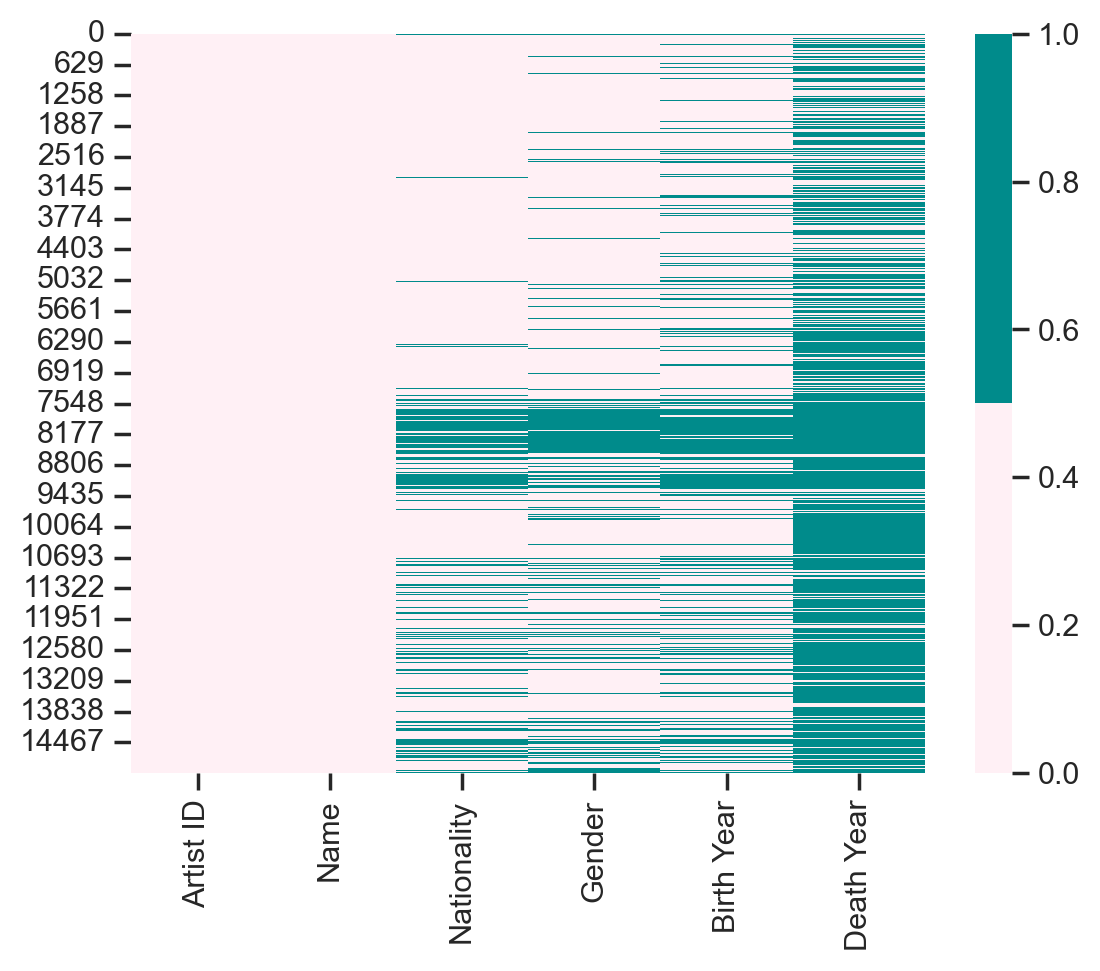

In [152]:
# Поработаем с заполнение пропусков в колонке "Birth Year"
colors = ['#FFF0F5', '#008B8B']
sns.heatmap(data[data.columns].isnull(), cmap=sns.color_palette(colors))

C:\Users\melko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Birth Year', ylabel='Density'>

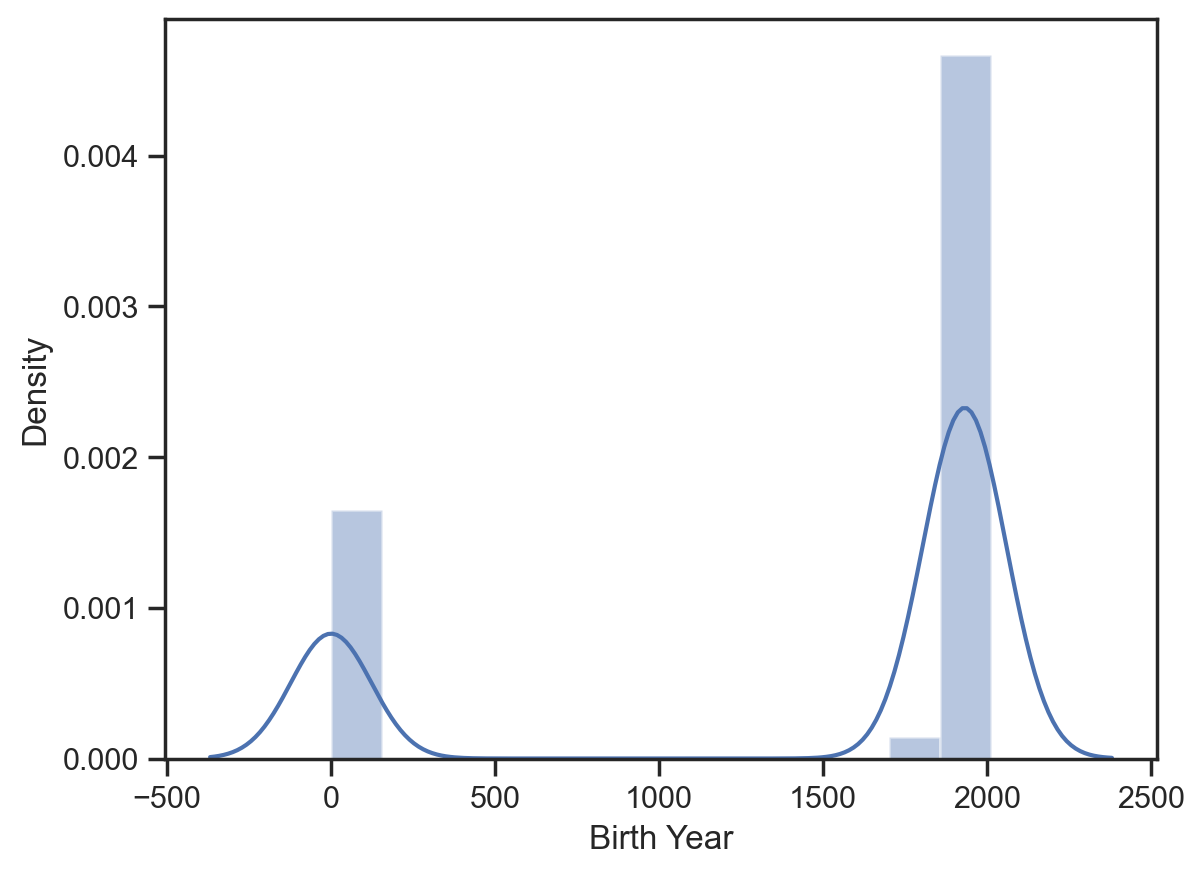

In [153]:
# Заполним пропуски в колонке нулями
sns.distplot(data['Birth Year'].fillna(0))

C:\Users\melko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

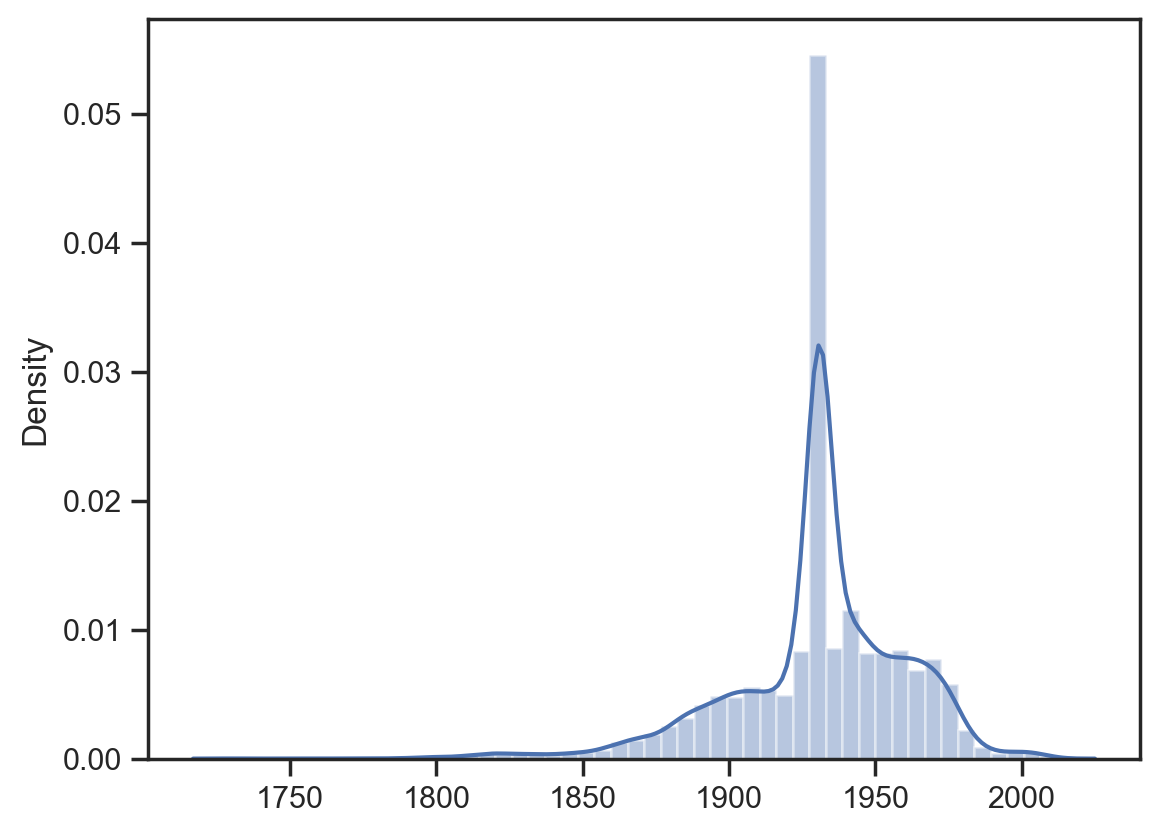

In [154]:
# Получаем совершенно не то, что нам нужно
# С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения
# Применим заполнение средними значениями
mean=sklearn.impute.SimpleImputer(strategy="mean") # Среднее значение
mean_rate=mean.fit_transform(data[['Birth Year']])
sns.distplot(mean_rate)

C:\Users\melko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

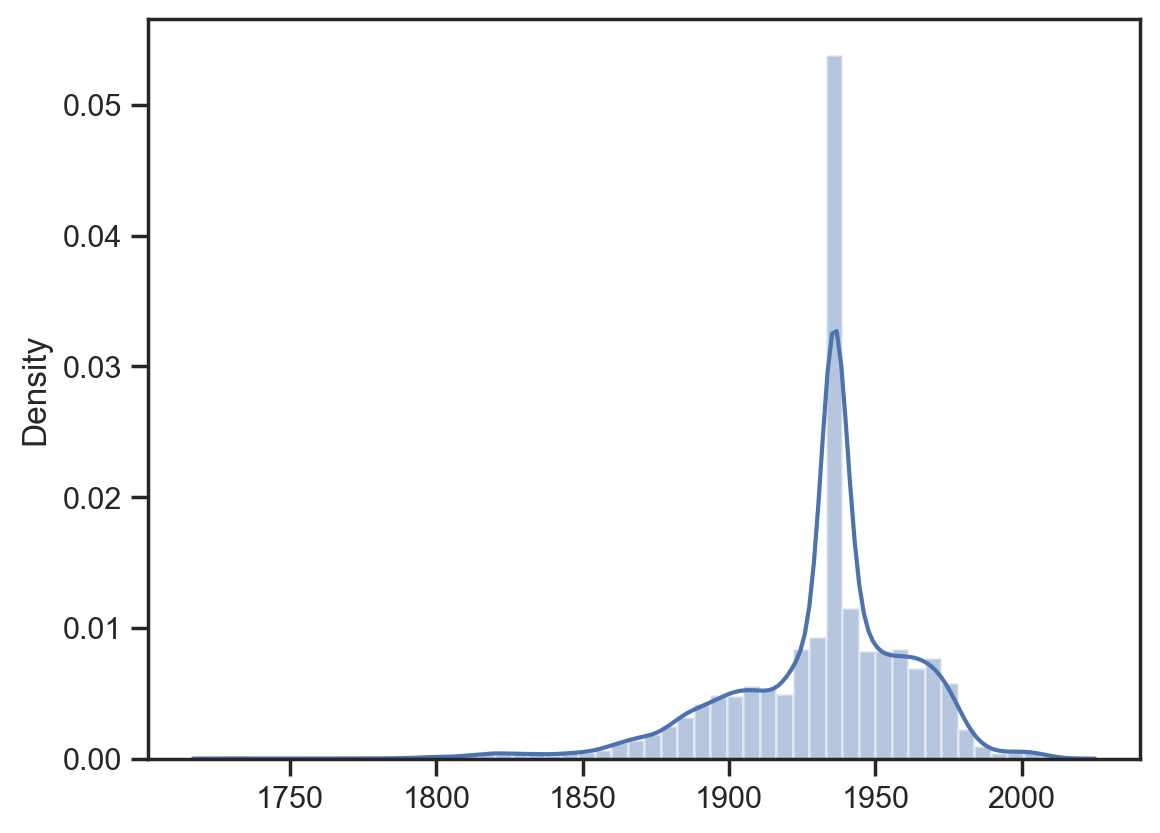

In [155]:
med=sklearn.impute.SimpleImputer(strategy="median") # Половина элементов больше медианы, половина меньше 
med_rate=med.fit_transform(data[['Birth Year']])
sns.distplot(med_rate)

C:\Users\melko\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\melko\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

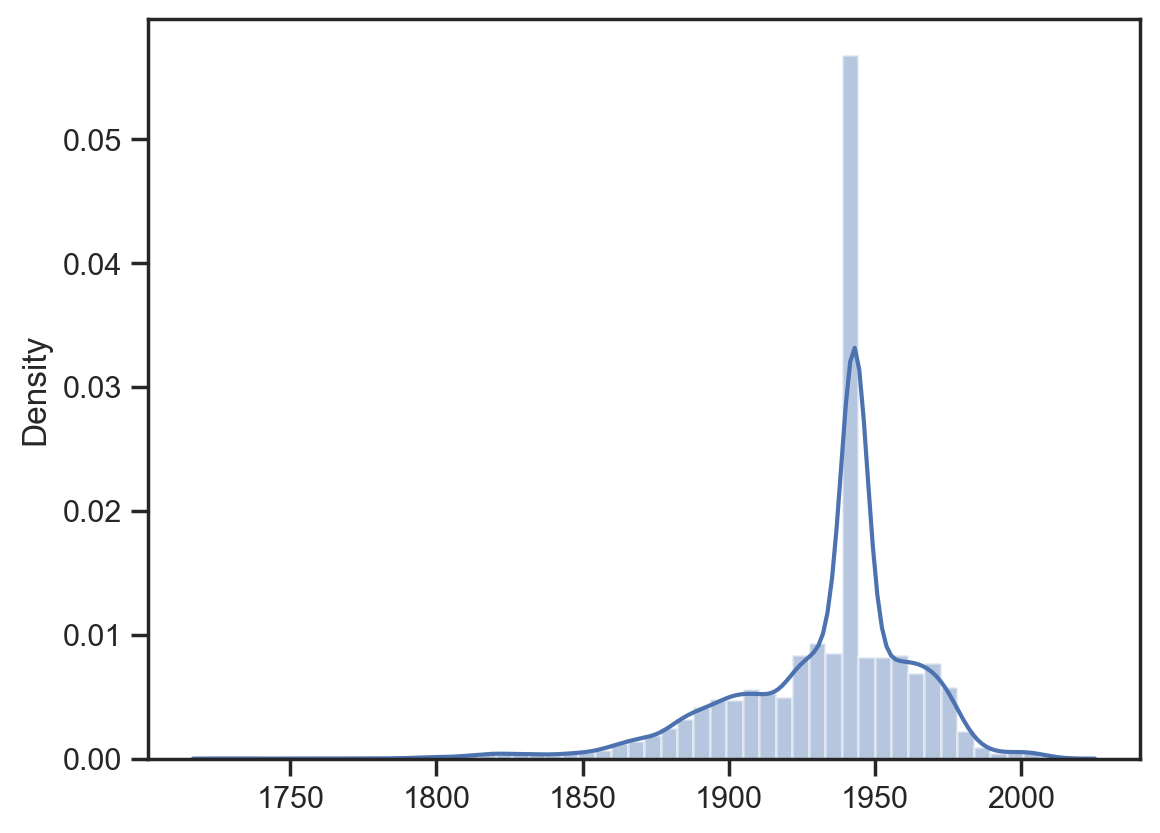

In [156]:
freq=sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rate=freq.fit_transform(data[['Birth Year']])
sns.distplot(freq_rate)

In [157]:
# Остановим выбор на средних значениях
data['Birth Year'] = mean_rate

Обработка пропусков в категориальных данных

In [158]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Nationality. Тип данных object. Количество пустых значений 2488, 16.49%.
Колонка Gender. Тип данных object. Количество пустых значений 3072, 20.36%.


In [162]:
cat_temp_data = data[['Nationality']]
cat_temp_data.head()

,Nationality
0,American
1,Spanish
2,American
3,American
4,Danish


In [163]:
cat_temp_data['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', nan, 'Israeli', 'British', 'Finnish',
       'Polish', 'Japanese', 'Guatemalan', 'Colombian', 'Romanian',
       'Russian', 'German', 'Argentine', 'Kuwaiti', 'Various', 'Belgian',
       'Dutch', 'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Yugoslav', 'Portuguese', 'Indian',
       'Icelandic', 'Irish', 'Guyanese', 'Uruguayan', 'Slovak',
       'Croatian', 'Greek', 'Peruvian', 'Chinese', 'Venezuelan',
       'Turkish', 'Panamanian', 'Algerian', 'Ecuadorian', 'South African',
       'Iranian', 'Korean', 'Canadian Inuit', 'Paraguayan',
       'Luxembourgish', 'Nicaraguan', 'Zimbabwean', 'Moroccan',
       'Tanzanian', 'Bulgarian', 'Tunisian', 'Sudanese', 'Taiwanese',
       'Ethiopian', 'Slovenian', 'Scottish', 

In [164]:
cat_temp_data[cat_temp_data['Nationality'].isnull()]

,Nationality
14,NaN
173,NaN
465,NaN
980,NaN
2002,NaN
...,...
15081,NaN
15083,NaN
15088,NaN
15089,NaN


In [165]:
# Импьютация наиболее частыми значениями
imp2 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['American'],
       ['Spanish'],
       ['American'],
       ...,
       ['American'],
       ['American'],
       ['American']], dtype=object)

In [166]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Afghan', 'Albanian', 'Algerian', 'American', 'Angolan',
       'Argentine', 'Australian', 'Austrian', 'Azerbaijani', 'Bahamian',
       'Belgian', 'Bolivian', 'Bosnian', 'Brazilian', 'British',
       'Bulgarian', 'Burkinabe', 'Cambodian', 'Cameroonian', 'Canadian',
       'Canadian Inuit', 'Catalan', 'Chilean', 'Chinese', 'Colombian',
       'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot',
       'Czech', 'Czechoslovakian', 'Danish', 'Dutch', 'Ecuadorian',
       'Egyptian', 'Emirati', 'Estonian', 'Ethiopian', 'Filipino',
       'Finnish', 'French', 'Georgian', 'German', 'Ghanaian', 'Greek',
       'Guatemalan', 'Guyanese', 'Haitian', 'Hungarian', 'Icelandic',
       'Indian', 'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli',
       'Italian', 'Ivorian', 'Japanese', 'Kazakhstani', 'Kenyan',
       'Korean', 'Kuwaiti', 'Kyrgyzstani', 'Latvian', 'Lebanese',
       'Lithuanian', 'Luxembourgish', 'Macedonian', 'Malaysian', 'Malian',
       'Mauritanian', 'Mexican', 

In [167]:
# Импьютация константой
imp3 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['American'],
       ['Spanish'],
       ['American'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

In [168]:
np.unique(data_imp3)

array(['Afghan', 'Albanian', 'Algerian', 'American', 'Angolan',
       'Argentine', 'Australian', 'Austrian', 'Azerbaijani', 'Bahamian',
       'Belgian', 'Bolivian', 'Bosnian', 'Brazilian', 'British',
       'Bulgarian', 'Burkinabe', 'Cambodian', 'Cameroonian', 'Canadian',
       'Canadian Inuit', 'Catalan', 'Chilean', 'Chinese', 'Colombian',
       'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot',
       'Czech', 'Czechoslovakian', 'Danish', 'Dutch', 'Ecuadorian',
       'Egyptian', 'Emirati', 'Estonian', 'Ethiopian', 'Filipino',
       'Finnish', 'French', 'Georgian', 'German', 'Ghanaian', 'Greek',
       'Guatemalan', 'Guyanese', 'Haitian', 'Hungarian', 'Icelandic',
       'Indian', 'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli',
       'Italian', 'Ivorian', 'Japanese', 'Kazakhstani', 'Kenyan',
       'Korean', 'Kuwaiti', 'Kyrgyzstani', 'Latvian', 'Lebanese',
       'Lithuanian', 'Luxembourgish', 'Macedonian', 'Malaysian', 'Malian',
       'Mauritanian', 'Mexican', 

In [172]:
data_imp3[data_imp3=='NA'].size

2488

In [173]:
data['Nationality'] = data_imp2

In [174]:
data['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', 'Israeli', 'British', 'Finnish', 'Polish',
       'Japanese', 'Guatemalan', 'Colombian', 'Romanian', 'Russian',
       'German', 'Argentine', 'Kuwaiti', 'Various', 'Belgian', 'Dutch',
       'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Yugoslav', 'Portuguese', 'Indian',
       'Icelandic', 'Irish', 'Guyanese', 'Uruguayan', 'Slovak',
       'Croatian', 'Greek', 'Peruvian', 'Chinese', 'Venezuelan',
       'Turkish', 'Panamanian', 'Algerian', 'Ecuadorian', 'South African',
       'Iranian', 'Korean', 'Canadian Inuit', 'Paraguayan',
       'Luxembourgish', 'Nicaraguan', 'Zimbabwean', 'Moroccan',
       'Tanzanian', 'Bulgarian', 'Tunisian', 'Sudanese', 'Taiwanese',
       'Ethiopian', 'Slovenian', 'Scottish', 'Latv

Кодирование категориальных признаков

In [186]:
types=data["Nationality"]
types.value_counts()

American       7686
German          930
French          839
British         835
Italian         531
               ... 
Tajik             1
Bahamian          1
Ivorian           1
Azerbaijani       1
Sahrawi           1
Name: Nationality, Length: 125, dtype: int64

Кодирование категорий целочисленными значениями - label encoding

In [177]:
le=sklearn.preprocessing.LabelEncoder()
type_le=le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124]


array(['Afghan', 'Albanian', 'Algerian', 'American', 'Angolan',
       'Argentine', 'Australian', 'Austrian', 'Azerbaijani', 'Bahamian',
       'Belgian', 'Bolivian', 'Bosnian', 'Brazilian', 'British',
       'Bulgarian', 'Burkinabe', 'Cambodian', 'Cameroonian', 'Canadian',
       'Canadian Inuit', 'Catalan', 'Chilean', 'Chinese', 'Colombian',
       'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot',
       'Czech', 'Czechoslovakian', 'Danish', 'Dutch', 'Ecuadorian',
       'Egyptian', 'Emirati', 'Estonian', 'Ethiopian', 'Filipino',
       'Finnish', 'French', 'Georgian', 'German', 'Ghanaian', 'Greek',
       'Guatemalan', 'Guyanese', 'Haitian', 'Hungarian', 'Icelandic',
       'Indian', 'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli',
       'Italian', 'Ivorian', 'Japanese', 'Kazakhstani', 'Kenyan',
       'Korean', 'Kuwaiti', 'Kyrgyzstani', 'Latvian', 'Lebanese',
       'Lithuanian', 'Luxembourgish', 'Macedonian', 'Malaysian', 'Malian',
       'Mauritanian', 'Mexican', 

Pandas get_dummies - быстрый вариант one-hot кодирования

In [178]:
type_s=pd.get_dummies(types)
type_s.head(25)

,Afghan,Albanian,Algerian,American,Angolan,Argentine,Australian,Austrian,Azerbaijani,Bahamian,...,Ugandan,Ukrainian,Uruguayan,Various,Venezuelan,Vietnamese,Welsh,Yugoslav,Zimbabwean,nationality unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Переходим к масштабированию данных.

Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два следующих подхода:

MinMax масштабирование

In [179]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [180]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Birth Year']])

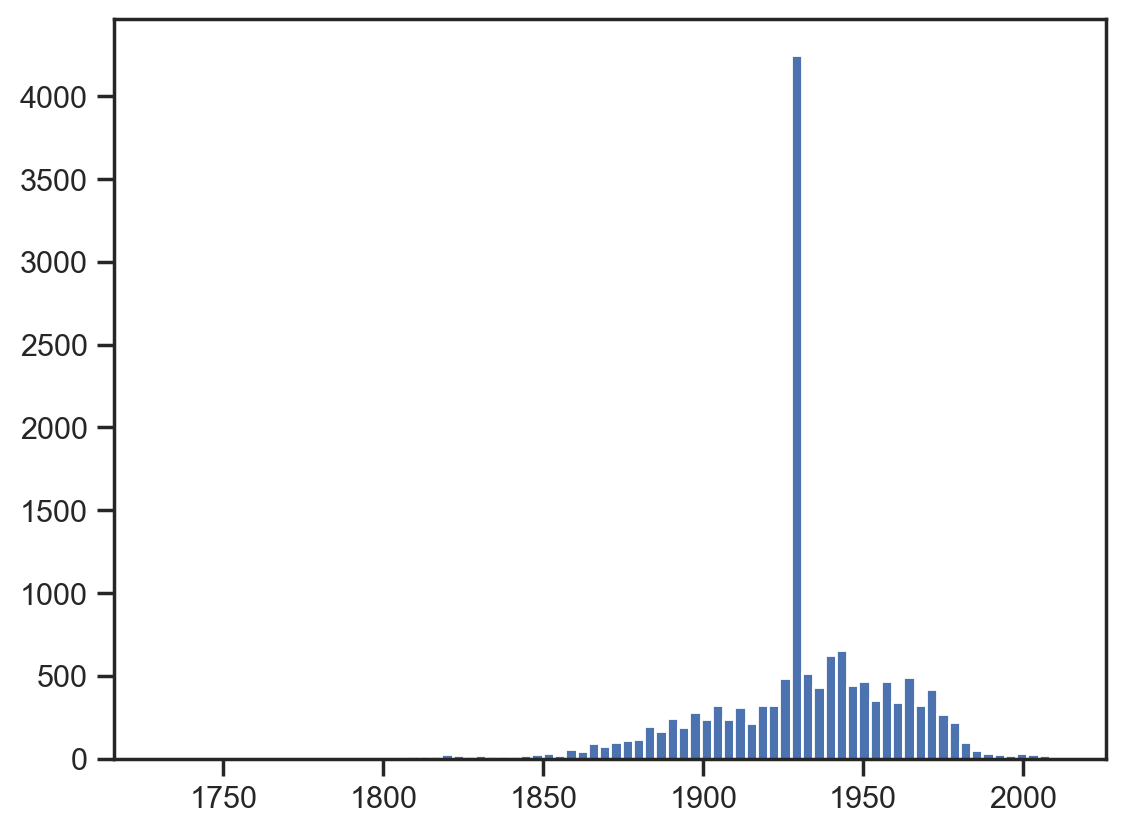

In [181]:
plt.hist(data['Birth Year'], 80)
plt.show()

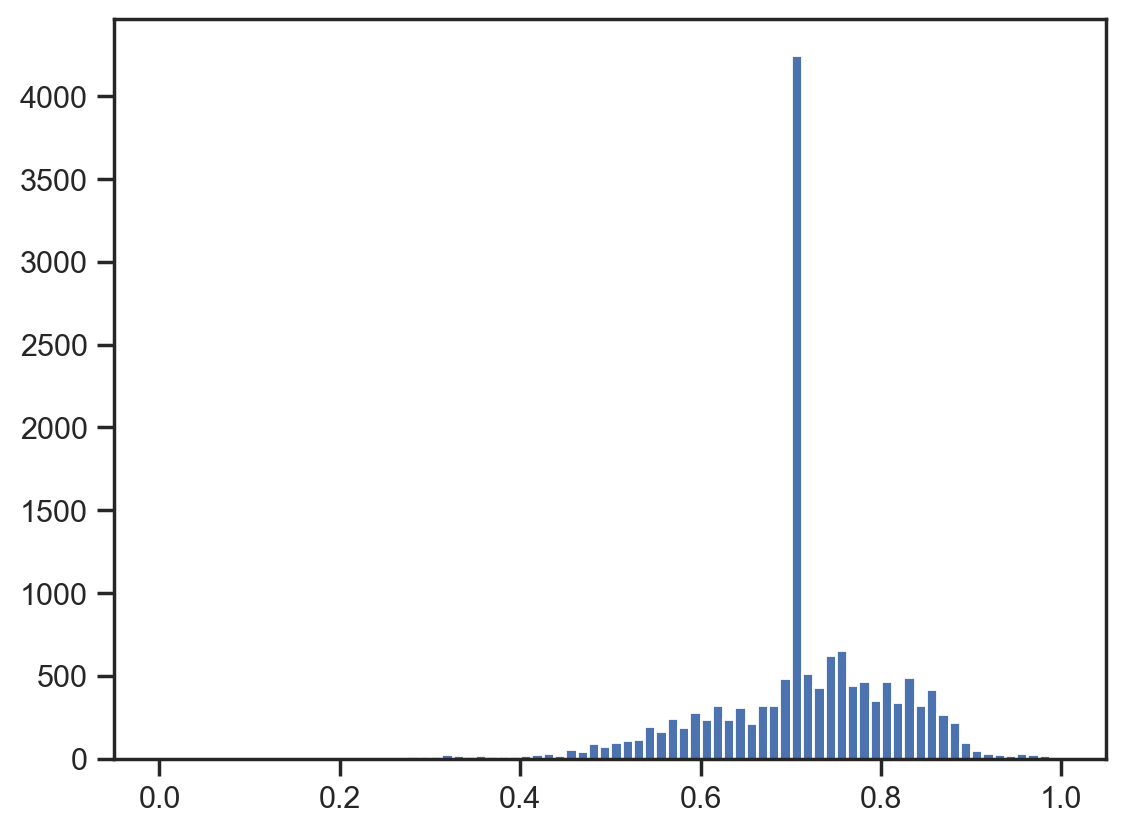

In [182]:
plt.hist(sc1_data, 80)
plt.show()

Масштабирование данных на основе Z-оценки - StandardScaler

In [183]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Birth Year']])

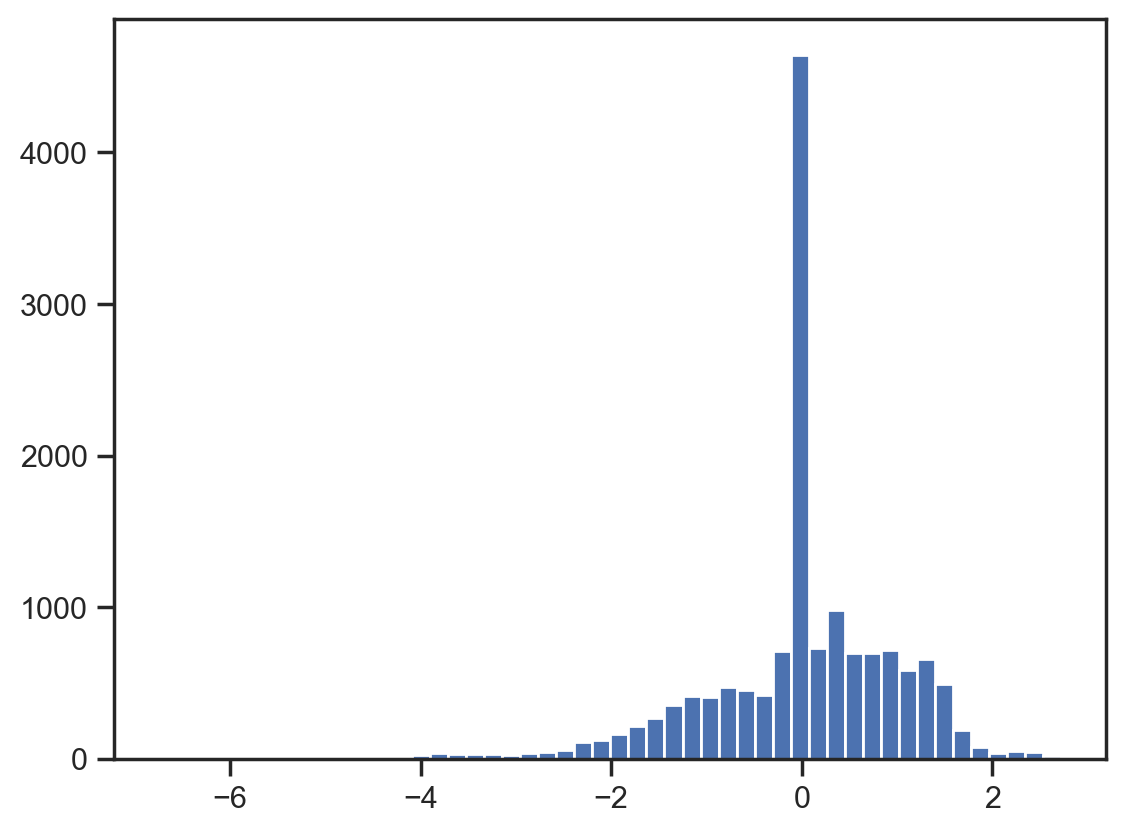

In [184]:
plt.hist(sc2_data, 50)
plt.show()